In [1]:
import os 
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from collections import Counter
from copy import deepcopy as dc

leaves_cluster = pd.read_csv('../result/S1_plasmid_net/tree/log_rescale/gksb/leaves_cluster.tsv', index_col=0, header=0, sep='\t')
taxonomy_df = pd.read_csv('../data/taxonomy_df.tsv', index_col=0, header=0, sep='\t')

In [2]:
g_c = dc(taxonomy_df[['g', 'c']])
g_c.dropna(inplace=True, how='any')
g_c = g_c.drop_duplicates()
g_c.set_index('g', inplace=True)

In [3]:
cluster_dict = {}
for cluster in set(leaves_cluster['cluster']):
    cluster_dict[cluster] = []
    tmp = leaves_cluster[leaves_cluster['cluster'] == cluster]
    for g in tmp.index:
        if g not in g_c.index:
            cluster_dict[cluster].append('unknown')
            continue
        c = g_c.loc[g, 'c']
        cluster_dict[cluster].append(c)

for cluster in set(leaves_cluster['supercluster']):
    if pd.isna(cluster):
        continue
    cluster_dict[cluster] = []
    tmp = leaves_cluster[leaves_cluster['supercluster'] == cluster]
    for subcluster in set(tmp['cluster']):
        cluster_dict[cluster] += cluster_dict[subcluster]
    

In [4]:

cluster_ratio = {}
for cluster in cluster_dict.keys():
    cluster_ratio[cluster] = Counter(cluster_dict[cluster])

In [5]:
cluster_ratio2 = copy.deepcopy(cluster_ratio)
for cluster in cluster_ratio.keys():
    total = sum(cluster_ratio[cluster].values())
    for c in cluster_ratio[cluster].keys():
        cluster_ratio[cluster][c] /= total

C10 Counter({'c__Clostridia': 2, 'c__Alphaproteobacteria': 1})
2


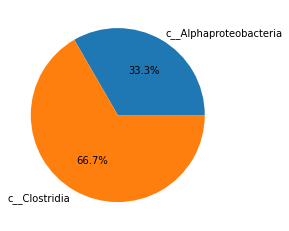

C2 Counter({'c__Gammaproteobacteria': 5, 'c__Bacilli': 4, 'c__Alphaproteobacteria': 4, 'c__Actinomycetia': 4, 'c__Bacteroidia': 3, 'c__Halobacteria': 1, 'c__Cyanobacteriia': 1, 'c__Desulfovibrionia': 1})
8


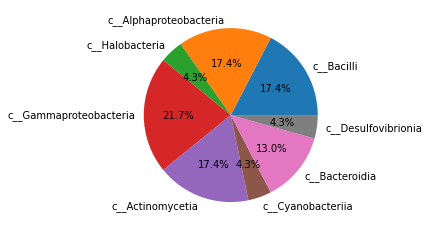

C3 Counter({'c__Gammaproteobacteria': 16})
1


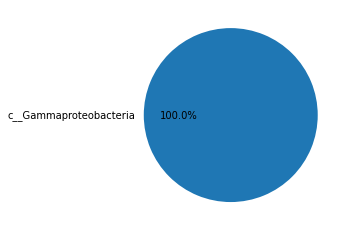

C4 Counter({'c__Clostridia': 7, 'unknown': 4, 'c__Bacilli': 1})
3
YES


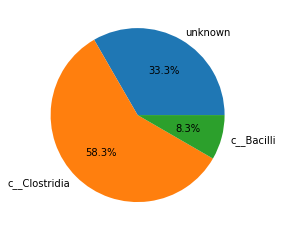

C5 Counter({'c__Clostridia': 8, 'c__Clostridia_A': 1})
2


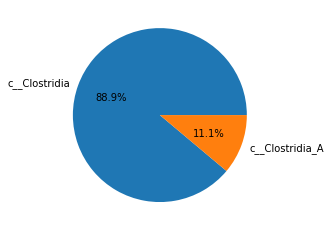

C6 Counter({'c__Clostridia': 6, 'c__Gammaproteobacteria': 1})
2


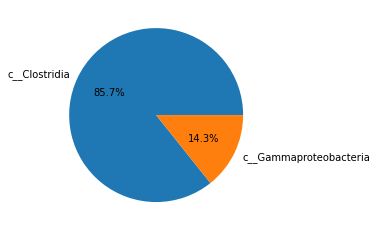

C7 Counter({'c__Clostridia': 2, 'c__Negativicutes': 2, 'c__Coriobacteriia': 1, 'c__Bacteroidia': 1, 'c__Bacilli': 1})
5


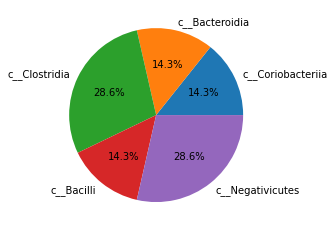

C8 Counter({'unknown': 2, 'c__Gammaproteobacteria': 1})
2
YES


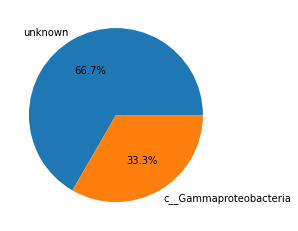

C9 Counter({'c__Gammaproteobacteria': 3})
1


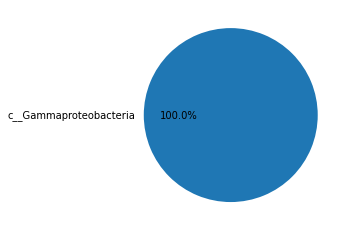

S1 Counter({'c__Alphaproteobacteria': 189, 'c__Gammaproteobacteria': 179, 'c__Clostridia': 93, 'c__Bacilli': 86, 'c__Actinomycetia': 45, 'unknown': 26, 'c__Bacteroidia': 19, 'c__Halobacteria': 15, 'c__Cyanobacteriia': 11, 'c__Campylobacteria': 8, 'c__Fusobacteriia': 6, 'c__Coriobacteriia': 4, 'c__Spirochaetia': 2, 'c__Negativicutes': 2, 'c__Acidobacteriae': 2, 'c__Desulfovibrionia': 2, 'c__Anaerolineae': 2, 'c__Vampirovibrionia': 1, 'c__Chlamydiia': 1, 'c__Verrucomicrobiae': 1, 'c__Myxococcia': 1, 'c__Leptospirae': 1, 'c__Methanosarcinia': 1, 'c__Cloacimonadia': 1, 'c__Desulfotomaculia': 1, 'c__Kiritimatiellae': 1, 'c__Nitrososphaeria': 1, 'c__Limnochordia': 1, 'c__Acidimicrobiia': 1, 'c__UBA8248': 1})
30
YES


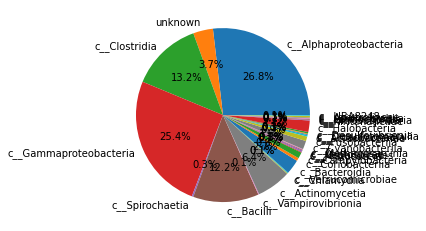

S1_C1 Counter({'c__Alphaproteobacteria': 39, 'c__Gammaproteobacteria': 30, 'c__Clostridia': 21, 'c__Actinomycetia': 18, 'c__Bacilli': 13, 'c__Cyanobacteriia': 8, 'unknown': 6, 'c__Fusobacteriia': 6, 'c__Campylobacteria': 5, 'c__Bacteroidia': 4, 'c__Coriobacteriia': 3, 'c__Acidobacteriae': 2, 'c__Cloacimonadia': 1, 'c__Desulfotomaculia': 1, 'c__Desulfovibrionia': 1, 'c__Halobacteria': 1})
16
YES


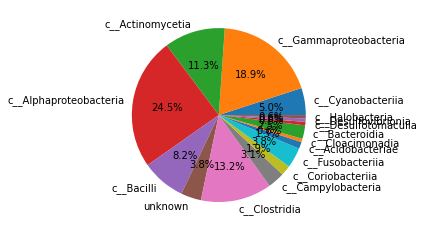

S1_C10 Counter({'c__Gammaproteobacteria': 7, 'c__Actinomycetia': 3, 'c__Alphaproteobacteria': 2, 'c__Nitrososphaeria': 1})
4


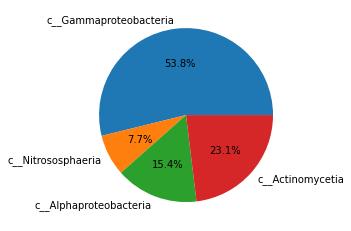

S1_C11 Counter({'c__Bacteroidia': 10})
1


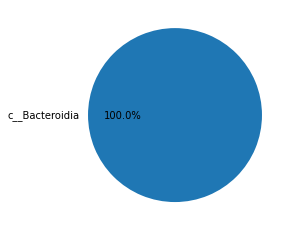

S1_C12 Counter({'c__Gammaproteobacteria': 8, 'c__Alphaproteobacteria': 1, 'c__Actinomycetia': 1})
3


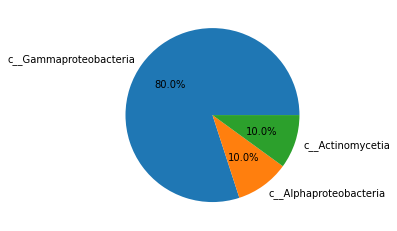

S1_C13 Counter({'c__Alphaproteobacteria': 8, 'c__Gammaproteobacteria': 1})
2


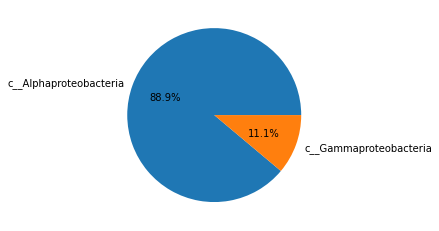

S1_C14 Counter({'c__Halobacteria': 8})
1


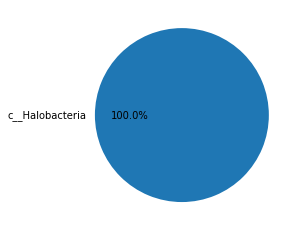

S1_C15 Counter({'c__Gammaproteobacteria': 7, 'c__Bacilli': 1})
2


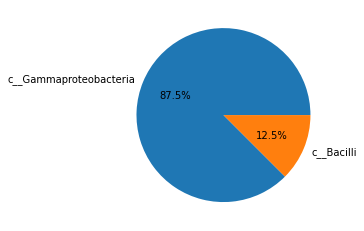

S1_C16 Counter({'c__Gammaproteobacteria': 2, 'c__Anaerolineae': 2, 'c__Acidimicrobiia': 1, 'c__Clostridia': 1, 'c__Actinomycetia': 1, 'c__UBA8248': 1})
6


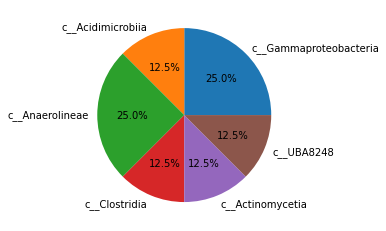

S1_C17 Counter({'c__Alphaproteobacteria': 8})
1


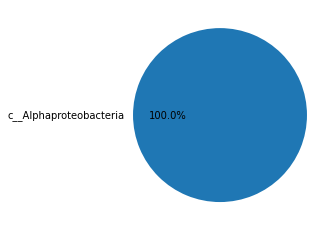

S1_C18 Counter({'c__Gammaproteobacteria': 3, 'c__Bacilli': 1, 'c__Kiritimatiellae': 1, 'unknown': 1, 'c__Spirochaetia': 1})
5
YES


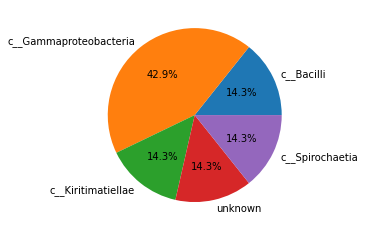

S1_C19 Counter({'c__Alphaproteobacteria': 6, 'unknown': 1})
2
YES


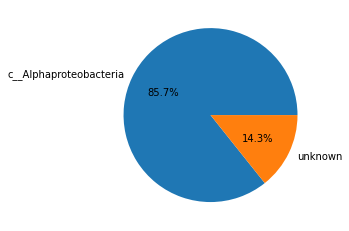

S1_C2 Counter({'c__Alphaproteobacteria': 55, 'c__Clostridia': 36, 'c__Gammaproteobacteria': 32, 'c__Bacilli': 18, 'unknown': 5, 'c__Actinomycetia': 4, 'c__Bacteroidia': 4, 'c__Chlamydiia': 1, 'c__Verrucomicrobiae': 1, 'c__Coriobacteriia': 1})
10
YES


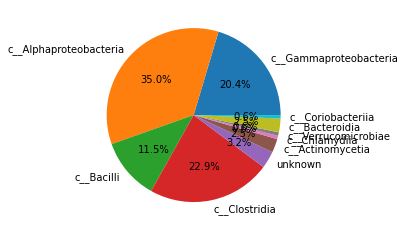

S1_C20 Counter({'c__Halobacteria': 6})
1


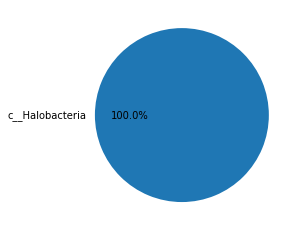

S1_C21 Counter({'c__Actinomycetia': 6})
1


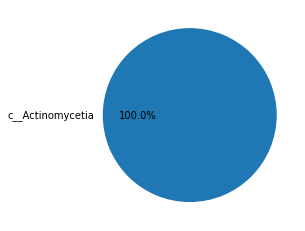

S1_C22 Counter({'c__Gammaproteobacteria': 6})
1


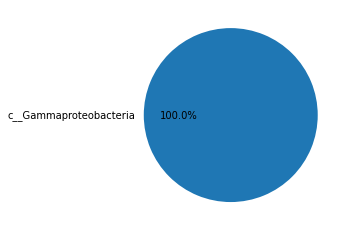

S1_C23 Counter({'c__Gammaproteobacteria': 3, 'c__Clostridia': 1, 'c__Spirochaetia': 1})
3


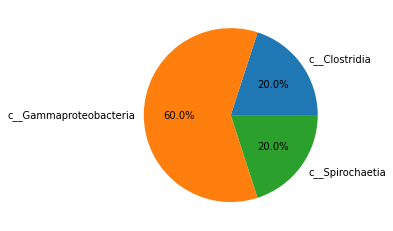

S1_C24 Counter({'c__Bacilli': 5})
1


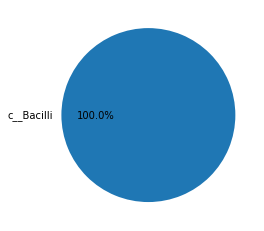

S1_C25 Counter({'c__Alphaproteobacteria': 4})
1


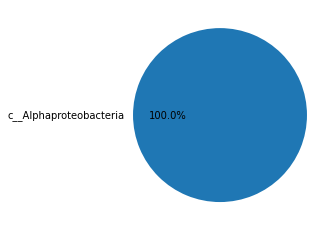

S1_C26 Counter({'c__Gammaproteobacteria': 4})
1


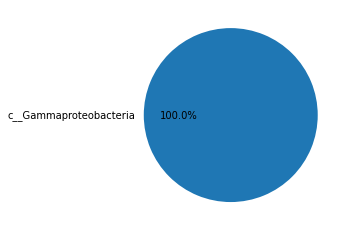

S1_C27 Counter({'c__Alphaproteobacteria': 3})
1


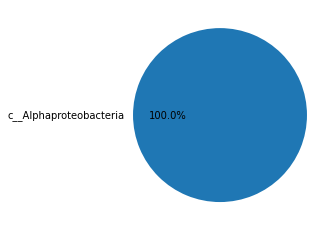

S1_C28 Counter({'c__Bacilli': 3})
1


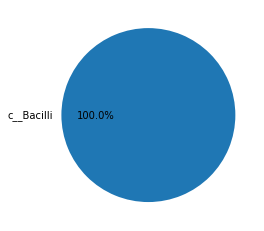

S1_C29 Counter({'c__Alphaproteobacteria': 2})
1


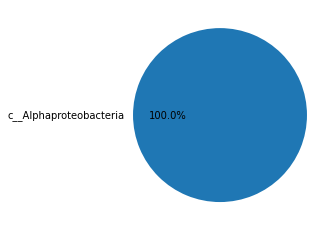

S1_C3 Counter({'c__Gammaproteobacteria': 38, 'c__Actinomycetia': 5, 'c__Bacilli': 2, 'c__Campylobacteria': 2, 'c__Bacteroidia': 1, 'c__Myxococcia': 1, 'unknown': 1})
7
YES


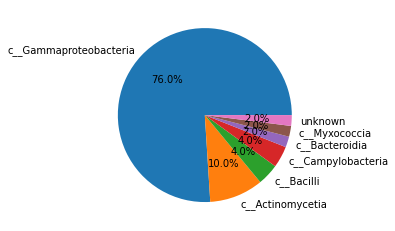

S1_C30 Counter({'c__Alphaproteobacteria': 2})
1


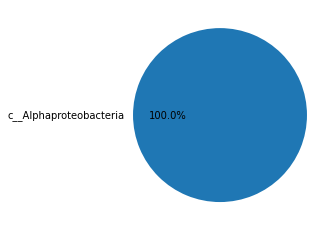

S1_C4 Counter({'c__Clostridia': 27, 'unknown': 10, 'c__Bacilli': 5, 'c__Negativicutes': 1, 'c__Limnochordia': 1, 'c__Alphaproteobacteria': 1, 'c__Gammaproteobacteria': 1})
7
YES


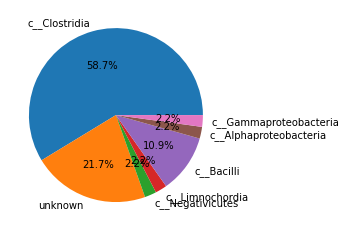

S1_C5 Counter({'c__Bacilli': 22, 'c__Clostridia': 7, 'c__Actinomycetia': 5, 'c__Cyanobacteriia': 2, 'c__Gammaproteobacteria': 2, 'c__Negativicutes': 1, 'c__Leptospirae': 1, 'unknown': 1, 'c__Campylobacteria': 1, 'c__Methanosarcinia': 1})
10
YES


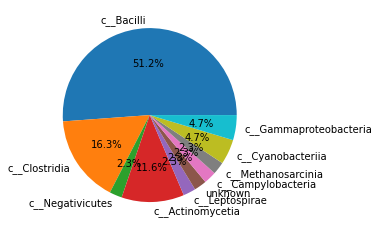

S1_C6 Counter({'c__Gammaproteobacteria': 34, 'c__Alphaproteobacteria': 3, 'c__Bacilli': 1, 'c__Vampirovibrionia': 1, 'c__Actinomycetia': 1})
5


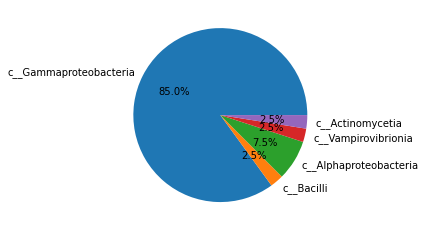

S1_C7 Counter({'c__Alphaproteobacteria': 26, 'c__Gammaproteobacteria': 1, 'c__Cyanobacteriia': 1, 'unknown': 1, 'c__Actinomycetia': 1, 'c__Bacilli': 1})
6
YES


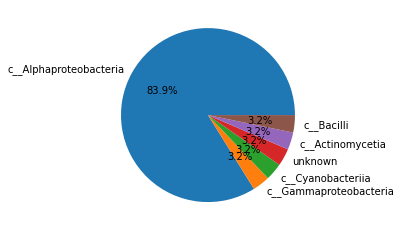

S1_C8 Counter({'c__Alphaproteobacteria': 29})
1


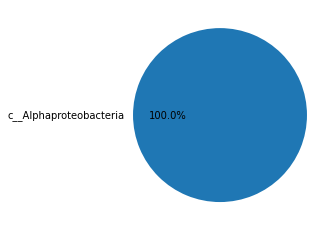

S1_C9 Counter({'c__Bacilli': 14, 'c__Desulfovibrionia': 1})
2


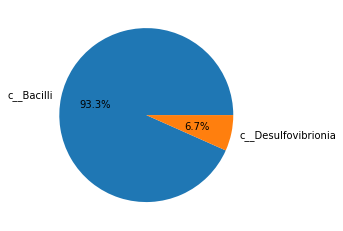

In [6]:
for cluster in sorted(cluster_ratio.keys()):
    print(cluster, cluster_ratio2[cluster])
    print(len(cluster_ratio2[cluster].keys()))
    if 'unknown' in cluster_ratio2[cluster].keys():
        print('YES')
    plt.pie(cluster_ratio[cluster].values(), labels=cluster_ratio[cluster].keys(), autopct='%1.1f%%')
    plt.show()